In [1]:
# imports
from astropy.io import fits
import matplotlib.pyplot as plt
# import matplotlib as mpl
import plotting as myP
import numpy as np 
import csv 
import match

In [2]:
# path variables 
path_cat = 'D:\IfA REU\Catalogs'
path_fig = 'D:\IfA REU\IfA-REU-Project\Figures'
path_csv = 'D:\IfA REU\IfA-REU-Project\Lists'

# Get COSMOS 2020 Data

In [3]:
##### Get data from catalog file

# open COSMOS master file and get data 
inf = fits.open(path_cat+'\COSMOS2020_CLASSIC_R1_v2.0_master.fits')
data = inf[1].data
# cols = inf[1].columns
# head = inf[0].header
inf.close()

# NOTE: Only run this once! It gets stuck if you try to run this again. 
#       If it gets stuck, interrupt and restart the jupyter kernel then run again. 

In [4]:
##### Get data from columns and print info 

# get IRAC data (unit = 'uJy')
ch1_data  = np.array(data['SPLASH_CH1_FLUX']) # 3.5686 um
print('Ch1 read')
ch2_data  = np.array(data['SPLASH_CH2_FLUX']) # 4.5067 um
print('Ch2 read')
ch3_data  = np.array(data['SPLASH_CH3_FLUX']) # 5.7788 um
print('Ch3 read')
ch4_data  = np.array(data['SPLASH_CH4_FLUX']) # 7.9958 um 
print('Ch4 read')

# get IDs
id_data   = np.array(data['ID'])
print('ID read')
id15_data = np.array(data['ID_COSMOS2015'])
print('ID15 read')

# get redshift 
z_data    = np.array(data['lp_zBEST'])
print('z read')

Ch1 read
Ch2 read
Ch3 read
Ch4 read
ID read
ID15 read
z read


In [5]:
##### print info
print('Col \t\t Min \t\t Max \t\t Count')
print('-------------------------------------------------------------')
print('CH1 \t\t',       min(ch1_data), '\t',   max(ch1_data), '\t',    len(ch1_data))
print('CH2 \t\t',       min(ch2_data), '\t',   max(ch2_data), '\t',    len(ch2_data))
print('CH3 \t\t',       min(ch3_data), '\t\t', max(ch3_data), '\t',    len(ch3_data))
print('CH4 \t\t',       min(ch4_data), '\t\t', max(ch4_data), '\t',    len(ch4_data))
print('ID  \t\t',       min(id_data),  '\t\t', max(id_data),  '\t',    len(id_data))
print('ID 2015 \t',     min(id15_data),'\t\t', max(id15_data),'\t',    len(id15_data))
print('z  \t\t',        min(z_data),   '\t\t', max(z_data),   '\t\t',  len(z_data))

Col 		 Min 		 Max 		 Count
-------------------------------------------------------------
CH1 		 -373.86588 	 11499.407 	 1720700
CH2 		 -200.00957 	 12870.739 	 1720700
CH3 		 -99.9 		 17447.684 	 1720700
CH4 		 -99.9 		 15091.21 	 1720700
ID  		 1 		 1720700 	 1720700
ID 2015 	 -99 		 1182096 	 1720700
z  		 -99.0 		 99.9 		 1720700


In [6]:
##### Filter out bad data from the columns and print info 

# boolean array, true when data is valid and false otherwise
irac_good = (ch1_data > 0) & (ch2_data > 0) & (ch3_data > 0) & (ch4_data > 0)

# filter data
ch1_data_good  = ch1_data[irac_good]
ch2_data_good  = ch2_data[irac_good]
ch3_data_good  = ch3_data[irac_good]
ch4_data_good  = ch4_data[irac_good]
id_data_good   = id_data[irac_good]
id15_data_good = id15_data[irac_good]
z_data_good    = z_data[irac_good]


In [7]:
###### info
print('Col \t\t Min \t\t Max \t\t Count')
print('----------------------------------------------------')
print('CH1 \t\t',       min(ch1_data_good), '\t',   max(ch1_data_good), '\t',   len(ch1_data_good))
print('CH2 \t\t',       min(ch2_data_good), '\t',   max(ch2_data_good), '\t',   len(ch2_data_good))
print('CH3 \t\t',       min(ch3_data_good), '\t',   max(ch3_data_good), '\t',   len(ch3_data_good))
print('CH4 \t\t',       min(ch4_data_good), '\t',   max(ch4_data_good), '\t',   len(ch4_data_good))
print('ID  \t\t',       min(id_data_good),  '\t\t', max(id_data_good),  '\t',   len(id_data_good))
print('ID 2015 \t',     min(id15_data_good),'\t\t', max(id15_data_good),'\t',   len(id15_data_good))
print('z   \t\t',       min(z_data_good),   '\t\t', max(z_data_good),   '\t\t', len(z_data_good))

Col 		 Min 		 Max 		 Count
----------------------------------------------------
CH1 		 0.012139931 	 11499.407 	 100469
CH2 		 0.0009702638 	 12870.739 	 100469
CH3 		 0.00084613566 	 13670.983 	 100469
CH4 		 0.00084613566 	 15091.21 	 100469
ID  		 40189 		 1631929 	 100469
ID 2015 	 1520 		 1174096 	 100469
z   		 -99.0 		 99.9 		 100469


# IR AGN Selection (Donley et al., 2012) 

x = log10 ( f5.8 μm / f3.6 μm ), 
y = log10 ( f8.0 μm / f4.5 μm ) 

x >= 0.08 AND 
y >= 0.15 AND
y >= (1.21 x) − 0.27 AND
y <= (1.21 x) + 0.27 AND
f4.5 μm > f3.6 μm AND
f5.8 μm > f4.5 μm AND
f8.0 μm > f5.8 μm

In [8]:
##### redefine the defaults for plots
myP.SetStyle()

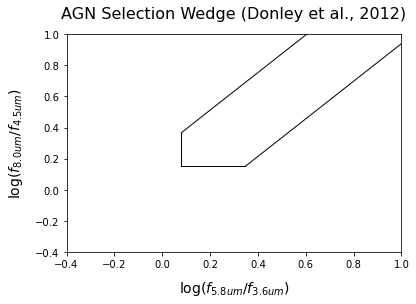

In [9]:
##### draw the Donley Wedge on a plot as a test 

# plot 
myP.PlotDonleyWedge()
plt.axis([-0.4,1,-0.4,1]) 
plt.title('AGN Selection Wedge (Donley et al., 2012)') 
plt.show()

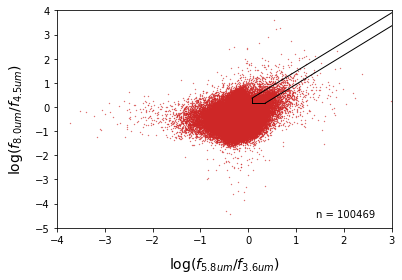

Galaxy count:  100469


In [18]:
##### plot all the galaxies with IRAC data

# calculate colors for each galaxy
x = np.log10( ch3_data_good / ch1_data_good ) # x = log10 ( f_5.6um / f_3.6um )
y = np.log10( ch4_data_good / ch2_data_good ) # y = log10 ( f_8.0um / f_4.5 um )

# plot 
plt.plot(x, y, 'o', c=myP.c_ir, markersize=0.3)
myP.PlotDonleyWedge()

# format
plt.axis([-4,3,-5,4]) 
# plt.title('IRAC Ch4/Ch2 vs. Ch3/Ch1 for all COSMOS sources') 
plt.xlabel(r'$\log(f_{5.8um}/f_{3.6um})$') 
plt.ylabel(r'$\log(f_{8.0um}/f_{4.5um})$')
myP.addtext_n(len(x))
myP.save(path_fig+'\COSMOS2020_all_IRAC_sources.png')
plt.show()

# print number of galaxies
print('Galaxy count: ', len(x))

In [11]:
##### Get the galaxies within the Donley selection wedge

# initialize empty lists
x_agn    = []
y_agn    = []
z_agn    = []
id_agn   = []
id15_agn = [] 

# look through each galaxy and check if it is inside the selection box
for i in range(len(x)):
    # if the point is an agn...
    if(x[i]>=0.08 and y[i]>=0.15 and y[i]>=(1.21*x[i]-0.27) and y[i]<=(1.21*x[i]+0.27)) :  
        # ... add values to respective list 
        x_agn.append(x[i])
        y_agn.append(y[i])
        z_agn.append(z_data_good[i])
        id_agn.append(id_data_good[i])
        id15_agn.append(id15_data_good[i])
    # else, move to next point

# confirm that sizes match
sizeRef = len(x_agn)
if( sizeRef == len(y_agn) and sizeRef == len(id_agn) and sizeRef == len(id15_agn) and sizeRef == len(z_agn)) :
    print("All lists are the same length")
else :
    print("ERR: all lists are NOT the same length")

All lists are the same length


In [12]:
# convert lists to arrays as needed
z_agn_arr = np.array(z_agn)
id15_agn_arr = np.array(id15_agn)

In [13]:
##### Save id list to a *.csv file 

# open file 
with open(path_csv+'\ID_COSMOS2020_Donley2012_AGN.csv', mode='w', newline='') as csv_file:
    # initialize csv
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    # write header
    writer.writerow(['This file contains the IDs of Donley et al 2012 selected AGN from the COSMOS 2020 catalog. These lists were generated in COSMOS20_AGN_selection.ipynb. Line 1 is the ID, Line 2 is the ID_COSMOS2015.'])
    # write agn id list to file 
    writer.writerow(id_agn)
    writer.writerow(id15_agn)

# confirm 
print('List saved: COSMOS2020_DONLEY2012_AGN.csv')


List saved: COSMOS2020_DONLEY2012_AGN.csv


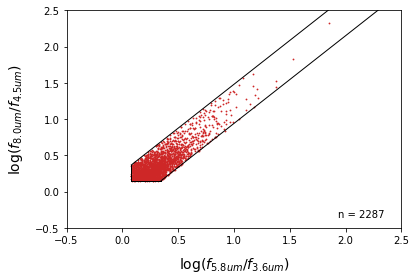

Galaxy count:  2287


In [14]:
##### Plot Donley selected AGN in the wedge 

# plot agn in selection box 
plt.plot(x_agn, y_agn, 'o', c=myP.c_ir, markersize=0.8)
myP.PlotDonleyWedge()
plt.axis([-0.5,2.5,-0.5,2.5]) 
# plt.title('Donley-selected AGN from COSMOS galaxies') 
myP.addtext_n(len(x_agn))
myP.save(path_fig+'\COSMOS2020_Donley-selected_AGN.png')
plt.show()

# print number of galaxies
print('Galaxy count: ', len(x_agn))

# Properties of IR AGN Selection

In [15]:
# filter out bad redshifts 
z_data_good_clean = z_data_good[ (z_data_good >0) & (z_data_good != 99.9)]
z_agn_arr_clean   = z_agn_arr[(z_agn_arr >0) & (z_agn_arr != 99.9)]

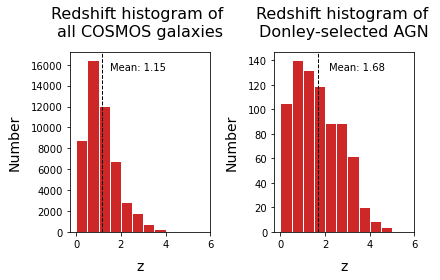

In [16]:
##### Plot the histograms of the redshifts of the Donley selected AGN 

# subplots 
fig, (z_hist, z_hist_agn) = plt.subplots(1,2)

## z_hist subplot

# plot all redshift histogram
z_hist.hist(z_data_good_clean, bins=np.arange(0,6,0.5), edgecolor='w', color=myP.c_ir)

# axis and titles 
z_hist.set_title('Redshift histogram of \nall COSMOS galaxies')
z_hist.set_xlabel('z')
z_hist.set_ylabel('Number')
z_hist.set_xticks([0,2,4,6])

# mean 
mean_all = z_data_good_clean.mean()
min_ylim_all, max_ylim_all = z_hist.get_ylim()
z_hist.axvline(mean_all, color='k',linestyle='dashed')
z_hist.text(mean_all*1.3, max_ylim_all*0.9, 'Mean: {:.2f}'.format(mean_all))

## z_hist_agn subplot

# plot agn redshift histogram
z_hist_agn.hist(z_agn_arr_clean, bins=np.arange(0,6,0.5), edgecolor='w', color=myP.c_ir)

# axis and titles 
z_hist_agn.set_title('Redshift histogram of \nDonley-selected AGN')
z_hist_agn.set_xlabel('z')
z_hist_agn.set_ylabel('Number')
z_hist_agn.set_xticks([0,2,4,6])

# mean 
mean_agn = z_agn_arr_clean.mean()
min_ylim_agn, max_ylim_agn = z_hist_agn.get_ylim()
z_hist_agn.axvline(mean_agn, color='k',linestyle='dashed')
z_hist_agn.text(mean_agn*1.3, max_ylim_agn*0.9, 'Mean: {:.2f}'.format(mean_agn))

## end subplots 

# formatting and save  
plt.tight_layout()
myP.save(path_fig+'\COSMOS2020_Redshift_Histogram.png')